# Modelo para a espécie American Toad

## Limpando dataset

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [51]:
base = pd.read_csv("greenFrogCorre.csv")

In [52]:
base.drop("id",axis=1,inplace=True)

In [53]:
base.describe()

,date,lat,lng,tornado,monthtodatesnowfalli,thunder,meantempi,snow,meanvism,minhumidity,...,meanwdird,meandewpti,meanvisi,maxhumidity,snowdepthi,mintempm,since1julsnowfalli,maxtempi,maxdewpti,mindewpti
count,3.109000e+03,3109.000000,3109.000000,959.0,0.0,959.000000,949.000000,959.000000,545.000000,948.000000,...,959.000000,948.000000,545.000000,948.000000,0.0,949.000000,0.0,949.000000,948.000000,948.000000
mean,2.008016e+07,44.573584,-78.035601,0.0,NaN,0.056309,61.782929,0.004171,16.763670,49.402954,...,166.933264,52.419831,10.426239,91.225738,NaN,11.225501,NaN,71.376185,57.633966,46.963080
std,4.780464e+04,0.983437,4.247357,0.0,NaN,0.230637,9.449471,0.064482,5.634104,16.746513,...,110.792390,10.263730,3.510702,9.163866,NaN,5.677305,NaN,10.280697,9.850197,11.095235
min,1.998050e+07,41.999415,-124.053950,0.0,NaN,0.000000,16.000000,0.000000,1.700000,9.000000,...,-1.000000,4.000000,1.100000,37.000000,NaN,-16.000000,NaN,19.000000,14.000000,-7.000000
25%,2.004051e+07,43.835053,-79.681970,0.0,NaN,0.000000,56.000000,0.000000,13.800000,37.000000,...,59.500000,46.000000,8.600000,87.000000,NaN,8.000000,NaN,66.000000,52.000000,39.000000
50%,2.008072e+07,44.439770,-79.142128,0.0,NaN,0.000000,62.000000,0.000000,14.500000,48.000000,...,195.000000,54.000000,9.000000,94.000000,NaN,12.000000,NaN,72.000000,59.000000,48.000000
75%,2.011081e+07,45.310200,-77.551376,0.0,NaN,0.000000,68.000000,0.000000,23.100000,62.000000,...,258.000000,60.000000,14.400000,100.000000,NaN,15.000000,NaN,79.000000,65.000000,55.000000
max,2.018101e+07,50.570539,-53.196550,0.0,NaN,1.000000,84.000000,1.000000,29.200000,100.000000,...,359.000000,77.000000,18.100000,100.000000,NaN,24.000000,NaN,95.000000,81.000000,72.000000


In [54]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3109 entries, 0 to 3108
Data columns (total 72 columns):
date                                  3109 non-null int64
lat                                   3109 non-null float64
lng                                   3109 non-null float64
tornado                               959 non-null float64
monthtodatesnowfalli                  0 non-null float64
thunder                               959 non-null float64
meantempi                             949 non-null float64
snow                                  959 non-null float64
meanvism                              545 non-null float64
meanwdire                             946 non-null object
minhumidity                           948 non-null float64
maxvism                               545 non-null float64
since1jancoolingdegreedays            1 non-null float64
coolingdegreedays                     949 non-null float64
maxdewptm                             948 non-null float64
monthtodatec

In [55]:
zeros = []
for c in base.columns:
    if (base[c].dtype != 'object' and base[c].mean() == 0):
        base.drop(c,axis=1,inplace=True)
        zeros.append(c)
zeros

['tornado', 'snowfallm', 'hail', 'snowfalli']

In [56]:
# features sem valores
vazias = []
for c in base.columns:
    if (base[c].count() == 0):
        vazias.append(c)
        base.drop(c,axis=1,inplace=True)
vazias

['monthtodatesnowfalli',
 'since1sepheatingdegreedays',
 'since1julsnowfallm',
 'monthtodatesnowfallm',
 'since1sepcoolingdegreedaysnormal',
 'since1sepheatingdegreedaysnormal',
 'since1sepcoolingdegreedays',
 'snowdepthm',
 'snowdepthi',
 'since1julsnowfalli']

In [57]:
# features com poucos dados
uni = []
for c in base.columns:
    if (base[c].count() < 600):
        uni.append(c)
        base.drop(c,axis=1,inplace=True)
uni

['meanvism',
 'maxvism',
 'since1jancoolingdegreedays',
 'monthtodatecoolingdegreedays',
 'monthtodateheatingdegreedaysnormal',
 'since1julheatingdegreedays',
 'coolingdegreedaysnormal',
 'minvisi',
 'since1julheatingdegreedaysnormal',
 'monthtodateheatingdegreedays',
 'monthtodatecoolingdegreedaysnormal',
 'minvism',
 'maxvisi',
 'heatingdegreedaysnormal',
 'since1jancoolingdegreedaysnormal',
 'meanvisi']

In [58]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3109 entries, 0 to 3108
Data columns (total 42 columns):
date                 3109 non-null int64
lat                  3109 non-null float64
lng                  3109 non-null float64
thunder              959 non-null float64
meantempi            949 non-null float64
snow                 959 non-null float64
meanwdire            946 non-null object
minhumidity          948 non-null float64
coolingdegreedays    949 non-null float64
maxdewptm            948 non-null float64
precipi              959 non-null object
heatingdegreedays    949 non-null float64
meanpressurem        891 non-null float64
precipsource         946 non-null object
rain                 959 non-null float64
minwspdm             938 non-null float64
meanwindspdi         938 non-null float64
fog                  959 non-null float64
humidity             935 non-null float64
minwspdi             938 non-null float64
meanpressurei        891 non-null float64
gdegreedays  

## Verificando se alguma coordenada dá no mar

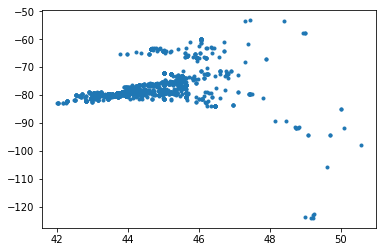

In [59]:
import mplleaflet
plt.scatter(base["lat"], base["lng"], marker=".")

## Convertendo Lontitude e Latitude para Rad

In [60]:
base['lat'] = base['lat']*np.pi/180
base['lng'] = base['lng']*np.pi/180
dadosEstacao['lat'] = dadosEstacao['lat']*np.pi/180
dadosEstacao['lng'] = dadosEstacao['lng']*np.pi/180

In [61]:
base.head(10)

,date,lat,lng,thunder,meantempi,snow,meanwdire,minhumidity,coolingdegreedays,maxdewptm,...,meantempm,maxpressurei,minpressurei,meanwdird,meandewpti,maxhumidity,mintempm,maxtempi,maxdewpti,mindewpti
0,20060821,0.858877,-2.165150,0.0,65.0,0.0,WNW,63.0,0.0,16.0,...,18.0,30.01,29.90,287.0,57.0,85.0,15.0,70.0,60.0,54.0
1,20110625,0.854992,-2.161187,0.0,56.0,0.0,Variable,43.0,0.0,9.0,...,13.0,30.08,30.05,-1.0,46.0,87.0,8.0,65.0,48.0,44.0
2,20110628,0.857881,-2.163680,0.0,64.0,0.0,NW,62.0,0.0,16.0,...,18.0,29.72,29.66,316.0,58.0,91.0,17.0,66.0,61.0,55.0
3,20120519,0.859358,-2.143145,0.0,52.0,0.0,SSW,19.0,0.0,6.0,...,10.0,30.14,30.04,211.0,38.0,95.0,2.0,67.0,43.0,22.0
4,20140719,0.858819,-2.146629,0.0,NaN,0.0,Variable,NaN,NaN,NaN,...,NaN,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,NaN
5,20100328,0.815134,-1.118828,0.0,22.0,0.0,South,29.0,0.0,-5.0,...,-5.0,30.54,30.39,175.0,13.0,78.0,-10.0,31.0,23.0,2.0
6,20050910,0.808583,-1.094109,0.0,57.0,0.0,NW,46.0,0.0,13.0,...,14.0,30.01,29.90,326.0,50.0,94.0,10.0,64.0,55.0,45.0
7,20110830,0.806327,-1.102295,0.0,65.0,0.0,SW,48.0,0.0,14.0,...,18.0,30.08,29.95,226.0,56.0,94.0,14.0,73.0,57.0,54.0
8,20130622,0.810111,-1.100941,0.0,66.0,0.0,WSW,35.0,0.0,13.0,...,18.0,NaN,NaN,251.0,51.0,88.0,12.0,76.0,55.0,45.0
9,20160601,0.809329,-1.101664,0.0,44.0,0.0,NNE,62.0,0.0,11.0,...,6.0,30.35,29.84,18.0,41.0,90.0,3.0,49.0,51.0,35.0


## Convertendo de Object a Numérico

In [62]:
objects = []
for c in base.columns:
    if (base[c].dtype == 'object'):
        objects.append(c)
objects

['meanwdire', 'precipi', 'precipsource', 'precipm']

### meanwdire

In [63]:
set(base['meanwdire'])

{nan,
 'ENE',
 'ESE',
 'East',
 'NE',
 'NNE',
 'NNW',
 'NW',
 'North',
 'SE',
 'SSE',
 'SSW',
 'SW',
 'South',
 'Variable',
 'WNW',
 'WSW',
 'West'}

In [64]:
base['meanwdire'].replace({'ENE':0,'ESE':1,'East':2,'NE':3,'NNE':3,'NNW':4,'NW':5,'North':6,'SE':7,'SSE':8,'SSW':9,'SW':10,'SW':11,'South':11,'Variable':12,'WNW':13,'WSW':14,'West':15},inplace=True)

In [65]:
set(base['meanwdire'])

{nan,
 1.0,
 2.0,
 3.0,
 4.0,
 5.0,
 nan,
 7.0,
 8.0,
 9.0,
 11.0,
 12.0,
 13.0,
 14.0,
 15.0,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 6.0,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,

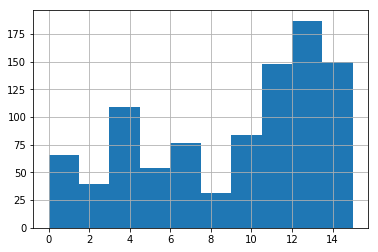

In [66]:
base['meanwdire'].hist()

In [67]:
base['meanwdire'].fillna(12, inplace=True)

In [68]:
base['meanwdire'].count()

3109

In [69]:
base.shape

(3109, 42)

### precipsource

In [70]:
set(base['precipsource'])

{nan, '3Or6HourObs', 'HourlyObs', 'Precip24Synop', 'Precip6GroupSynop'}

In [71]:
base['precipsource'].replace({'3Or6HourObs':0,'HourlyObs':1,'Precip24Synop':2,'Precip6GroupSynop':3},inplace=True)

In [72]:
set(base['precipsource'])

{0.0,
 nan,
 2.0,
 3.0,
 nan,
 nan,
 1.0,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan

In [73]:
base['precipsource'].count()

946

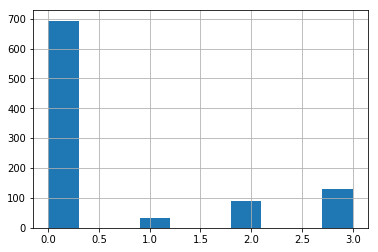

In [74]:
base['precipsource'].hist()

In [75]:
base['precipsource'].fillna(0,inplace=True)

In [76]:
base['precipsource'].count()

3109

### precipi

In [77]:
set(base['precipi'])

{nan,
 '0.00',
 '0.01',
 '0.02',
 '0.03',
 '0.04',
 '0.05',
 '0.07',
 '0.08',
 '0.09',
 '0.11',
 '0.12',
 '0.14',
 '0.16',
 '0.17',
 '0.18',
 '0.20',
 '0.24',
 '0.25',
 '0.27',
 '0.28',
 '0.30',
 '0.31',
 '0.32',
 '0.35',
 '0.39',
 '0.43',
 '0.51',
 '0.52',
 '0.60',
 '0.63',
 '0.67',
 '0.70',
 '0.71',
 '0.75',
 '0.78',
 '1.14',
 '1.65',
 '2.76',
 '3.94',
 'T'}

In [78]:
base['precipi'].replace({'T':6},inplace=True)

In [79]:
set(base['precipi'])

{nan,
 6,
 '0.00',
 '0.01',
 '0.02',
 '0.03',
 '0.04',
 '0.05',
 '0.07',
 '0.08',
 '0.09',
 '0.11',
 '0.12',
 '0.14',
 '0.16',
 '0.17',
 '0.18',
 '0.20',
 '0.24',
 '0.25',
 '0.27',
 '0.28',
 '0.30',
 '0.31',
 '0.32',
 '0.35',
 '0.39',
 '0.43',
 '0.51',
 '0.52',
 '0.60',
 '0.63',
 '0.67',
 '0.70',
 '0.71',
 '0.75',
 '0.78',
 '1.14',
 '1.65',
 '2.76',
 '3.94'}

In [80]:
base['precipi'] = base['precipi'].astype('float')

In [81]:
set(base['precipi'])

{0.0,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 6.0,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 0.04,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 0.7,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 na

In [82]:
base['precipi'].count()

959

In [83]:
base['precipi'].fillna(base['precipi'].mean(),inplace=True)

In [84]:
base['precipi'].count()

3109

### precipm

In [85]:
set(base['precipm'])

{nan,
 '0.0',
 '0.00',
 '0.2',
 '0.3',
 '0.4',
 '0.5',
 '0.6',
 '0.7',
 '0.8',
 '0.9',
 '1.0',
 '1.3',
 '1.78',
 '1.8',
 '10.0',
 '100.0',
 '11.0',
 '13.0',
 '13.21',
 '15.2',
 '16.0',
 '17.0',
 '17.8',
 '18.0',
 '19.0',
 '19.8',
 '2.0',
 '2.3',
 '2.8',
 '29.0',
 '3.0',
 '3.6',
 '4.0',
 '4.3',
 '4.57',
 '42.0',
 '5.0',
 '6.0',
 '6.3',
 '6.86',
 '7.0',
 '7.62',
 '70.0',
 '8.0',
 '8.13',
 '9.0',
 'T'}

In [86]:
base['precipm'].replace({'T': 10},inplace=True)

In [87]:
set(base['precipm'])

{nan,
 10,
 '0.0',
 '0.00',
 '0.2',
 '0.3',
 '0.4',
 '0.5',
 '0.6',
 '0.7',
 '0.8',
 '0.9',
 '1.0',
 '1.3',
 '1.78',
 '1.8',
 '10.0',
 '100.0',
 '11.0',
 '13.0',
 '13.21',
 '15.2',
 '16.0',
 '17.0',
 '17.8',
 '18.0',
 '19.0',
 '19.8',
 '2.0',
 '2.3',
 '2.8',
 '29.0',
 '3.0',
 '3.6',
 '4.0',
 '4.3',
 '4.57',
 '42.0',
 '5.0',
 '6.0',
 '6.3',
 '6.86',
 '7.0',
 '7.62',
 '70.0',
 '8.0',
 '8.13',
 '9.0'}

In [88]:
base['precipm'] = base['precipm'].astype("float")

In [89]:
base['precipm'].count()

959

In [90]:
base['precipm'].fillna(base['precipm'].mean(),inplace=True)

In [91]:
base['precipm'].count()

3109

## Criando base usando as estações do ano 

In [92]:
primavera = base.loc[(base['date']%1000<=620) & (base['date']%1000>=320)]
primavera['date'] = "0" #Primavera
verao = base.loc[(base['date']%1000<=921) & (base['date']%1000>=621)]
verao['date'] = "1" #Verão
outono = base.loc[(base['date']%1000<=1220) & (base['date']%1000>=922)]
outono['date'] = "2" #Outono
inverno = base.loc[(base['date']%1000<=1221) & (base['date']%1000>=319)]
inverno['date'] = "3" #Inverno
frames = [primavera,verao,outono,inverno]
dadosEstacao = pd.concat(frames)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs

In [93]:
dadosEstacao

,date,lat,lng,thunder,meantempi,snow,meanwdire,minhumidity,coolingdegreedays,maxdewptm,...,meantempm,maxpressurei,minpressurei,meanwdird,meandewpti,maxhumidity,mintempm,maxtempi,maxdewpti,mindewpti
3,0,0.859358,-2.143145,0.0,52.0,0.0,9.0,19.0,0.0,6.0,...,10.0,30.14,30.04,211.0,38.0,95.0,2.0,67.0,43.0,22.0
5,0,0.815134,-1.118828,0.0,22.0,0.0,11.0,29.0,0.0,-5.0,...,-5.0,30.54,30.39,175.0,13.0,78.0,-10.0,31.0,23.0,2.0
9,0,0.809329,-1.101664,0.0,44.0,0.0,3.0,62.0,0.0,11.0,...,6.0,30.35,29.84,18.0,41.0,90.0,3.0,49.0,51.0,35.0
10,0,0.815134,-1.118828,0.0,46.0,0.0,11.0,33.0,0.0,2.0,...,8.0,30.02,29.84,236.0,33.0,86.0,4.0,54.0,36.0,30.0
12,0,0.806782,-1.103315,0.0,45.0,0.0,3.0,75.0,0.0,10.0,...,7.0,30.09,29.59,26.0,43.0,94.0,3.0,51.0,50.0,36.0
17,0,0.796113,-1.134839,0.0,59.0,0.0,11.0,19.0,0.0,7.0,...,15.0,29.86,29.78,222.0,39.0,93.0,5.0,77.0,45.0,32.0
18,0,0.800199,-1.160494,0.0,56.0,0.0,1.0,25.0,0.0,11.0,...,14.0,30.32,30.05,103.0,40.0,88.0,6.0,69.0,52.0,30.0
29,0,0.801067,-1.137174,1.0,66.0,0.0,11.0,41.0,1.0,16.0,...,19.0,29.42,29.23,222.0,54.0,88.0,14.0,75.0,61.0,48.0
30,0,0.806148,-1.163117,0.0,56.0,0.0,4.0,25.0,0.0,7.0,...,14.0,29.95,29.88,346.0,39.0,87.0,5.0,71.0,45.0,32.0
31,0,0.806148,-1.163117,0.0,64.0,0.0,9.0,28.0,0.0,14.0,...,18.0,30.50,30.36,212.0,48.0,93.0,8.0,82.0,57.0,43.0


## Atualizando a Data para somente o mês

In [94]:
base

,date,lat,lng,thunder,meantempi,snow,meanwdire,minhumidity,coolingdegreedays,maxdewptm,...,meantempm,maxpressurei,minpressurei,meanwdird,meandewpti,maxhumidity,mintempm,maxtempi,maxdewpti,mindewpti
0,20060821,0.858877,-2.165150,0.0,65.0,0.0,13.0,63.0,0.0,16.0,...,18.0,30.01,29.90,287.0,57.0,85.0,15.0,70.0,60.0,54.0
1,20110625,0.854992,-2.161187,0.0,56.0,0.0,12.0,43.0,0.0,9.0,...,13.0,30.08,30.05,-1.0,46.0,87.0,8.0,65.0,48.0,44.0
2,20110628,0.857881,-2.163680,0.0,64.0,0.0,5.0,62.0,0.0,16.0,...,18.0,29.72,29.66,316.0,58.0,91.0,17.0,66.0,61.0,55.0
3,20120519,0.859358,-2.143145,0.0,52.0,0.0,9.0,19.0,0.0,6.0,...,10.0,30.14,30.04,211.0,38.0,95.0,2.0,67.0,43.0,22.0
4,20140719,0.858819,-2.146629,0.0,NaN,0.0,12.0,NaN,NaN,NaN,...,NaN,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,NaN
5,20100328,0.815134,-1.118828,0.0,22.0,0.0,11.0,29.0,0.0,-5.0,...,-5.0,30.54,30.39,175.0,13.0,78.0,-10.0,31.0,23.0,2.0
6,20050910,0.808583,-1.094109,0.0,57.0,0.0,5.0,46.0,0.0,13.0,...,14.0,30.01,29.90,326.0,50.0,94.0,10.0,64.0,55.0,45.0
7,20110830,0.806327,-1.102295,0.0,65.0,0.0,11.0,48.0,0.0,14.0,...,18.0,30.08,29.95,226.0,56.0,94.0,14.0,73.0,57.0,54.0
8,20130622,0.810111,-1.100941,0.0,66.0,0.0,14.0,35.0,0.0,13.0,...,18.0,NaN,NaN,251.0,51.0,88.0,12.0,76.0,55.0,45.0
9,20160601,0.809329,-1.101664,0.0,44.0,0.0,3.0,62.0,0.0,11.0,...,6.0,30.35,29.84,18.0,41.0,90.0,3.0,49.0,51.0,35.0


In [95]:
base['date'] = (base['date']//100)%100

In [96]:
base

,date,lat,lng,thunder,meantempi,snow,meanwdire,minhumidity,coolingdegreedays,maxdewptm,...,meantempm,maxpressurei,minpressurei,meanwdird,meandewpti,maxhumidity,mintempm,maxtempi,maxdewpti,mindewpti
0,8,0.858877,-2.165150,0.0,65.0,0.0,13.0,63.0,0.0,16.0,...,18.0,30.01,29.90,287.0,57.0,85.0,15.0,70.0,60.0,54.0
1,6,0.854992,-2.161187,0.0,56.0,0.0,12.0,43.0,0.0,9.0,...,13.0,30.08,30.05,-1.0,46.0,87.0,8.0,65.0,48.0,44.0
2,6,0.857881,-2.163680,0.0,64.0,0.0,5.0,62.0,0.0,16.0,...,18.0,29.72,29.66,316.0,58.0,91.0,17.0,66.0,61.0,55.0
3,5,0.859358,-2.143145,0.0,52.0,0.0,9.0,19.0,0.0,6.0,...,10.0,30.14,30.04,211.0,38.0,95.0,2.0,67.0,43.0,22.0
4,7,0.858819,-2.146629,0.0,NaN,0.0,12.0,NaN,NaN,NaN,...,NaN,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,NaN
5,3,0.815134,-1.118828,0.0,22.0,0.0,11.0,29.0,0.0,-5.0,...,-5.0,30.54,30.39,175.0,13.0,78.0,-10.0,31.0,23.0,2.0
6,9,0.808583,-1.094109,0.0,57.0,0.0,5.0,46.0,0.0,13.0,...,14.0,30.01,29.90,326.0,50.0,94.0,10.0,64.0,55.0,45.0
7,8,0.806327,-1.102295,0.0,65.0,0.0,11.0,48.0,0.0,14.0,...,18.0,30.08,29.95,226.0,56.0,94.0,14.0,73.0,57.0,54.0
8,6,0.810111,-1.100941,0.0,66.0,0.0,14.0,35.0,0.0,13.0,...,18.0,NaN,NaN,251.0,51.0,88.0,12.0,76.0,55.0,45.0
9,6,0.809329,-1.101664,0.0,44.0,0.0,3.0,62.0,0.0,11.0,...,6.0,30.35,29.84,18.0,41.0,90.0,3.0,49.0,51.0,35.0


## Padronizando com MinMaxScaler

In [97]:
padraoMes = MinMaxScaler().fit_transform(base)
padraoEstacao = MinMaxScaler().fit_transform(dadosEstacao)

/usr/local/lib/python2.7/dist-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python2.7/dist-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype float64, object were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [98]:
padraoMes

array([[0.63636364, 0.84126489, 0.        , ..., 0.67105263, 0.68656716,
        0.7721519 ],
       [0.45454545, 0.815297  , 0.00320426, ..., 0.60526316, 0.50746269,
        0.64556962],
       [0.45454545, 0.83461099, 0.00118863, ..., 0.61842105, 0.70149254,
        0.78481013],
       ...,
       [0.45454545, 0.80901825, 0.93556142, ...,        nan,        nan,
               nan],
       [0.45454545, 0.81511301, 0.93557582, ...,        nan,        nan,
               nan],
       [0.54545455, 0.81511301, 0.93557582, ...,        nan,        nan,
               nan]])

In [99]:
padraoEstacao

array([[0.        , 0.84448006, 0.0177932 , ..., 0.5625    , 0.34482759,
        0.36708861],
       [0.        , 0.54885705, 0.84606325, ..., 0.        , 0.        ,
        0.11392405],
       [0.        , 0.51005152, 0.85994166, ..., 0.28125   , 0.48275862,
        0.53164557],
       ...,
       [1.        , 0.80901825, 0.93556142, ...,        nan,        nan,
               nan],
       [1.        , 0.81511301, 0.93557582, ...,        nan,        nan,
               nan],
       [1.        , 0.81511301, 0.93557582, ...,        nan,        nan,
               nan]])